In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('data.csv')

In [69]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data = data.to_numpy()
m, n = data.shape
np.random.shuffle(data)

In [71]:
test_data = data[0:1000].T
# Label column
y_test = test_data[0]
# Without label column
x_test = test_data[1:n] / 255

In [72]:
train_data = data[1000:m].T
y_train = train_data[0]
x_train = train_data[1:n] / 255
_,m_train = x_train.shape

In [73]:
def init_params():
    #Weights and bias from each layer
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    exp = np.exp(Z)
    return exp / sum(exp)
    

def foward_prop(W1,b1,W2,b2,X):
    # First layer
    # Linear combination of our input matrix, weight and bias 1
    Z1 = W1.dot(X) + b1
    # Activation function: Rectified Linear Unit
    A1 = ReLU(Z1)
    # Second layer
    # Linear combination of result matriz in first layer, weight and bias 2
    Z2 = W2.dot(A1) + b2
    # Activation function
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_y = np.zeros((Y.size, Y.max() + 1))
    one_hot_y[np.arange(Y.size), Y] = 1
    return one_hot_y.T
    
def deriv_ReLU(Z):
    return Z > 0
    

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_y = one_hot(Y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2,dW1, db1, dW2, db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha *  db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha *  db2
    return W1, b1, W2, b2

In [74]:
def get_predictions(A):
    return np.argmax(A, 0)

def get_accuracy(predictions, Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations,alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = foward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1,  W2, b2, dW1,  db1, dW2, db2, alpha)
        if (i % 50) == 0:
            accuracy = get_accuracy(get_predictions(A2),Y)
            print(f"Iteration: {i}")
            print(f"Accuracy: {accuracy}")
    return W1, b2, W2, b2

In [75]:
W1, b1, W2, b2 = gradient_descent(x_train,y_train,1500,0.1)

[0 1 9 ... 1 1 1] [8 0 8 ... 6 4 1]
Iteration: 0
Accuracy: 0.08614634146341463
[6 0 9 ... 6 4 6] [8 0 8 ... 6 4 1]
Iteration: 50
Accuracy: 0.25114634146341464
[4 0 8 ... 6 7 6] [8 0 8 ... 6 4 1]
Iteration: 100
Accuracy: 0.348390243902439
[4 0 8 ... 1 4 1] [8 0 8 ... 6 4 1]
Iteration: 150
Accuracy: 0.4913170731707317
[5 5 8 ... 1 4 1] [8 0 8 ... 6 4 1]
Iteration: 200
Accuracy: 0.5977073170731707
[5 5 8 ... 1 4 1] [8 0 8 ... 6 4 1]
Iteration: 250
Accuracy: 0.6575609756097561
[5 5 8 ... 1 4 1] [8 0 8 ... 6 4 1]
Iteration: 300
Accuracy: 0.7025853658536585
[3 0 8 ... 6 4 1] [8 0 8 ... 6 4 1]
Iteration: 350
Accuracy: 0.737609756097561
[3 0 8 ... 6 4 1] [8 0 8 ... 6 4 1]
Iteration: 400
Accuracy: 0.762219512195122
[3 0 8 ... 6 4 1] [8 0 8 ... 6 4 1]
Iteration: 450
Accuracy: 0.7807073170731708
[3 0 8 ... 6 4 1] [8 0 8 ... 6 4 1]
Iteration: 500
Accuracy: 0.793609756097561
[3 0 8 ... 6 4 1] [8 0 8 ... 6 4 1]
Iteration: 550
Accuracy: 0.8039268292682927
[3 0 8 ... 6 4 1] [8 0 8 ... 6 4 1]
Iteration

In [82]:
def make_prediction(X, W1, b1, W2, b2):
    _, _, _, A2 = foward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index,None]
    prediction = make_prediction(x_test[:, index,None], W1, b1, W2, b2)
    label = y_test[index]
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

Prediction: [3]
Label: 3


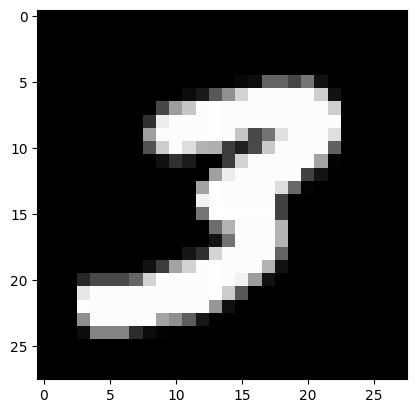

In [105]:
test_prediction(30,W1, b1,W2, b2)